In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [10]:
# define a function to show the img

def img_show(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # we use open cv to read the image
    plt.figure(figsize=(10,7))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.show()

In [14]:
# read image

img_path = 'your/img/path/image_name.image_format'
img = cv.imread(img_path)

In [12]:
# implement Otsu method
# img: in BGR format (we use open cv to read the image)

def Otsu_thresholding(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    var = np.var(gray)
    mean = np.mean(gray)
    n = gray.shape[0]*gray.shape[1]  # total number of img pixels
    within_class_variances = []
    
    q = 0 
    mu1 = 0
    for t in range(254):
        p = np.count_nonzero(gray == t+1)/n
        mu1 = (q*mu1) + ((t+1)*p)
        q = q + p
        mu1 /= q
        mu2 = (mean - (q*mu1))/(1-q)
        
        between_class_variance = q*(1-q)*(mu1-mu2)**2
        within_class_variances.append(var-between_class_variance)
        
    threshold = within_class_variances.index(min(within_class_variances))
    print('threshold value by Otsu method: ' + str(threshold))
    
    img_show(gray)
    thresholded_img = np.zeros((gray.shape)).astype(np.uint8)
    indxs = np.where(gray >= threshold)
    for i,j in zip(indxs[0],indxs[1]):
        thresholded_img[i,j] = 255
    img_show(thresholded_img)

threshold value by Otsu method: 149


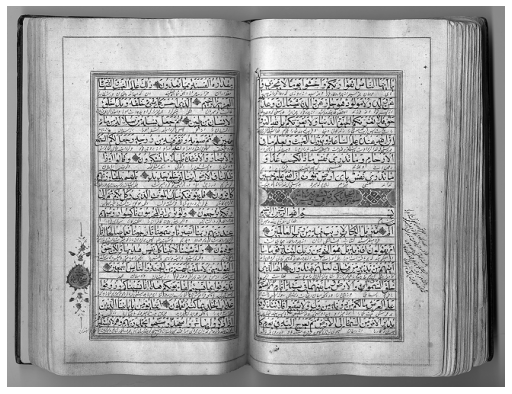

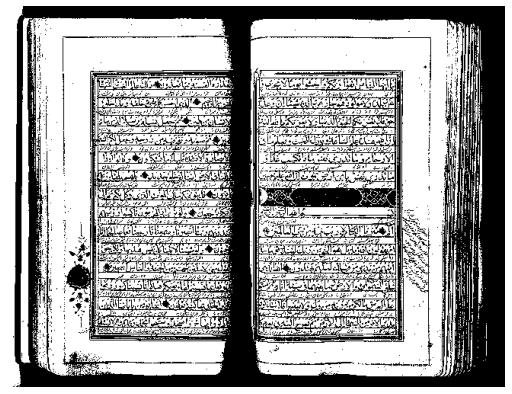

In [13]:
Otsu_thresholding(img)